In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Preprocessing


In [2]:
# set paramaters
IMAGE_SIZE  = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20 

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 4500 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [5]:
len(dataset)

141

In [6]:
501*32

16032

In [7]:
for image_batch, label_batch,in dataset.take(1):
    print (image_batch[0].shape)
    print(label_batch.numpy())

(256, 256, 3)
[0 1 0 1 2 1 1 2 1 2 0 1 2 2 1 1 2 2 2 2 1 1 1 2 1 1 2 1 2 1 2 2]


[1 2 2 1 2 0 1 1 1 0 0 2 2 2 2 1 2 2 0 0 2 0 0 0 1 2 0 0 1 2 1 0]


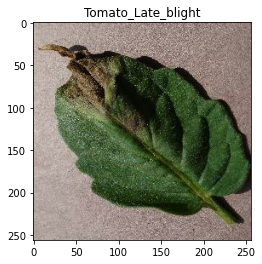

In [8]:
for image_batch, label_batch,in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    print(label_batch.numpy())

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, shuffle=True, test_split=0.1, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int (val_split * ds_size)
    train_ds=dataset.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [10]:
 train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
    

In [11]:
len(train_ds)

112

In [12]:
len(val_ds)

14

In [13]:
len(test_ds)

15

In [14]:
#randomized sampling of images
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
#normalize the images
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
#data augmentation
data_augmentation = tf.keras.Sequential([
   layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
   layers.experimental.preprocessing.RandomRotation(0.2) 
])

# Create the model

In [17]:
input_shape =  (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
     resize_and_rescale,
     data_augmentation,
     layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape ),
     layers.MaxPooling2D((2, 2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
     layers.Conv2D(64, (3,3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
    # Convert 3-d data to 2-d data
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(n_classes,activation='softmax'),
 ])
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
112/112 [==============================] - 565s 5s/step - loss: 1.1018 - accuracy: 0.4146 - val_loss: 0.9774 - val_accuracy: 0.5335
Epoch 2/20
112/112 [==============================] - 441s 4s/step - loss: 0.9781 - accuracy: 0.4771 - val_loss: 0.9166 - val_accuracy: 0.5491
Epoch 3/20
112/112 [==============================] - 371s 3s/step - loss: 0.7362 - accuracy: 0.6387 - val_loss: 0.6560 - val_accuracy: 0.7321
Epoch 4/20
112/112 [==============================] - 309s 3s/step - loss: 0.5182 - accuracy: 0.7776 - val_loss: 0.8380 - val_accuracy: 0.7254
Epoch 5/20
112/112 [==============================] - 314s 3s/step - loss: 0.4257 - accuracy: 0.8251 - val_loss: 0.5428 - val_accuracy: 0.7924
Epoch 6/20
112/112 [==============================] - 304s 3s/step - loss: 0.4026 - accuracy: 0.8298 - val_loss: 0.4057 - val_accuracy: 0.8460
Epoch 7/20
112/112 [==============================] - 303s 3s/step - loss: 0.3225 - accuracy: 0.8666 - val_loss: 0.4436 - val_accuracy: 0.8192

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



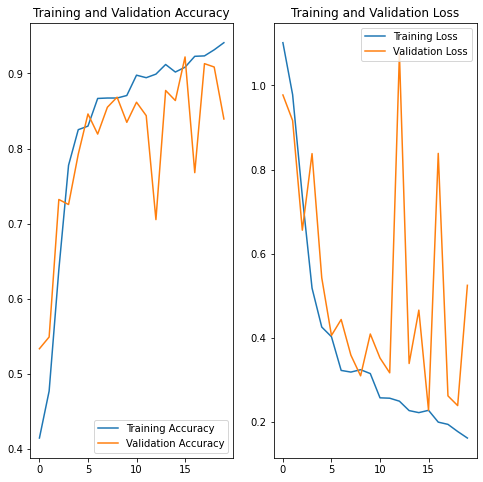

In [22]:
plt.figure(figsize =(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand.dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [25]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


In [26]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
pip install streamlit